##Group 9
##Lab7 Gale-Shapley and Irving Algorithms (Groups)
### Created by:
### Patiño Camargo, Andres Felipe
### Rativa Gutierrez, David Alexander
### Giraldo Castro, Byron Daniel

#**Punto 1**
## Find the best and worst cases for the Gale-Shapley and Irving ( An Efficient Algorithm for the “Stable Roommates” Problem) Algorithms and run in Colab these algorithms for those cases for n=4 and 40.
## - Gale–Shapley algorithm simply explained – towardsdatascience
## - Stable Marriage Problem – geeksforgeeks
## - Stable matching, as a game – towardsdatascience.com

Algoritmo Gale-Shapley

In [ ]:


# This function returns true if
# woman 'w' prefers man 'm1' over man 'm'
def wPrefersM1OverM(prefer, w, m, m1):

    # Check if w prefers m over her
    # current engagement m1
    for i in range(N):

        # If m1 comes before m in list of w,
        # then w prefers her current engagement,
        # don't do anything
        if (prefer[w][i] == m1):
            return True

        # If m comes before m1 in w's list,
        # then free her current engagement
        # and engage her with m
        if (prefer[w][i] == m):
            return False

# Prints stable matching for N boys and N girls.
# Boys are numbered as 0 to N-1.
# Girls are numbered as N to 2N-1.
def stableMarriage(prefer):

    # Stores partner of women. This is our output
    # array that stores passing information.
    # The value of wPartner[i] indicates the partner
    # assigned to woman N+i. Note that the woman numbers
    # between N and 2*N-1. The value -1 indicates
    # that (N+i)'th woman is free
    wPartner = [-1 for i in range(N)]

    # An array to store availability of men.
    # If mFree[i] is false, then man 'i' is free,
    # otherwise engaged.
    mFree = [False for i in range(N)]

    freeCount = N

    # While there are free men
    while (freeCount > 0):

        # Pick the first free man (we could pick any)
        m = 0
        while (m < N):
            if (mFree[m] == False):
                break
            m += 1

        # One by one go to all women according to
        # m's preferences. Here m is the picked free man
        i = 0
        while i < N and mFree[m] == False:
            w = prefer[m][i]

            # The woman of preference is free,
            # w and m become partners (Note that
            # the partnership maybe changed later).
            # So we can say they are engaged not married
            if (wPartner[w - N] == -1):
                wPartner[w - N] = m
                mFree[m] = True
                freeCount -= 1

            else:

                # If w is not free
                # Find current engagement of w
                m1 = wPartner[w - N]

                # If w prefers m over her current engagement m1,
                # then break the engagement between w and m1 and
                # engage m with w.
                if (wPrefersM1OverM(prefer, w, m, m1) == False):
                    wPartner[w - N] = m
                    mFree[m] = True
                    mFree[m1] = False
            i += 1

            # End of Else
        # End of the for loop that goes
        # to all women in m's list
    # End of main while loop

    # Print solution
    print("Woman ", " Man")
    for i in range(N):
        print(i + N, "\t", wPartner[i])

# Driver Code
prefer = [[7, 5, 6, 4], [5, 4, 6, 7],
          [4, 5, 6, 7], [4, 5, 6, 7],
          [0, 1, 2, 3], [0, 1, 2, 3],
          [0, 1, 2, 3], [0, 1, 2, 3]]

stableMarriage(prefer)


Woman   Man
4 	 2
5 	 1
6 	 3
7 	 0


In [ ]:
import random

N = 5

menprefer = [random.sample(range(1, N + 1), N) for _ in range(N)]
wowmenprefer = [random.sample(range(1, N + 1), N) for _ in range(N)]
prefer = menprefer + wowmenprefer

print(f"Gale-Shapley algorithm with N={N}\n")
print(f"Preferences array: \n{menprefer+wowmenprefer}\n")
stableMarriage(prefer)

Gale-Shapley algorithm with N=5

Preferences array: 
[[4, 3, 1, 5, 2], [1, 5, 3, 2, 4], [5, 1, 3, 2, 4], [3, 2, 4, 1, 5], [3, 4, 5, 2, 1], [2, 1, 3, 4, 5], [5, 3, 1, 4, 2], [4, 5, 2, 1, 3], [1, 4, 3, 2, 5], [5, 3, 2, 1, 4]]

Woman   Man
5 	 2
6 	 1
7 	 0
8 	 3
9 	 4


In [ ]:
import random

N = 40

menprefer = [random.sample(range(1, N + 1), N) for _ in range(N)]
wowmenprefer = [random.sample(range(1, N + 1), N) for _ in range(N)]
prefer = menprefer + wowmenprefer

print(f"Gale-Shapley algorithm with N={N}\n")
print(f"Preferences array: \n{menprefer+wowmenprefer}\n")
stableMarriage(prefer)

Gale-Shapley algorithm with N=40

Preferences array: 
[[26, 38, 28, 29, 5, 30, 20, 23, 31, 2, 17, 14, 24, 27, 13, 22, 33, 39, 25, 9, 3, 4, 35, 12, 15, 11, 34, 10, 18, 19, 36, 7, 16, 37, 8, 40, 6, 1, 21, 32], [9, 25, 36, 26, 3, 40, 22, 2, 27, 16, 24, 33, 17, 29, 20, 7, 34, 30, 4, 19, 21, 11, 12, 1, 23, 35, 10, 14, 39, 38, 13, 32, 28, 37, 5, 31, 18, 15, 6, 8], [25, 19, 29, 14, 26, 38, 1, 21, 37, 5, 31, 30, 4, 22, 34, 33, 2, 8, 39, 24, 32, 35, 23, 40, 17, 15, 18, 36, 27, 9, 7, 12, 20, 10, 11, 28, 13, 3, 6, 16], [8, 4, 17, 25, 22, 40, 7, 18, 31, 3, 35, 33, 13, 23, 38, 11, 27, 24, 32, 14, 28, 26, 20, 36, 21, 37, 12, 16, 2, 29, 19, 9, 30, 6, 15, 1, 34, 10, 39, 5], [32, 34, 10, 19, 18, 31, 36, 38, 20, 22, 11, 33, 39, 35, 14, 28, 30, 8, 6, 15, 26, 21, 40, 24, 23, 1, 9, 29, 13, 2, 25, 16, 27, 17, 7, 37, 12, 4, 3, 5], [40, 6, 37, 23, 36, 10, 21, 20, 29, 16, 31, 39, 28, 8, 5, 17, 9, 24, 26, 30, 12, 27, 35, 1, 33, 34, 19, 15, 38, 4, 13, 18, 3, 2, 25, 22, 32, 14, 7, 11], [38, 5, 36, 16, 34, 23, 2, 

Algoritmo Irving

In [ ]:
#Code from https://github.com/szhangbi

import numpy as np
# import pandas as pd
import random
# import copy
import matplotlib.pyplot as plt
# import csv

ENABLE_PRINT = 0
DETAILED_ENABLE_PRINT=0
#convert the preference matrix into ranking matrix
def get_ranking(preference):
    ranking = np.zeros(preference.shape,dtype=int)
    for row in range(0,len(preference[:,0])):
        for col in range(0,len(preference[0,:])):
            ranking[row,col]=list(preference[row,:]).index(col)
    return ranking


def phaseI_reduction(preference, leftmost, rightmost, ranking):
    ## leftmost and rightmost is updated here
    set_proposed_to=set() ## this set contains the players who has been proposed to and holds someone
    for person in range(0,len((preference[0,:]))):
        proposer = person
        while True:
            next_choice = preference[proposer,leftmost[proposer]]
            current = preference[next_choice,rightmost[next_choice]]

            while ranking[next_choice,proposer]> ranking[next_choice,current]:
                ## proposer proposed to his next choice but being rejected
                if ENABLE_PRINT and DETAILED_ENABLE_PRINT: print("player", proposer+1, "proposed to", next_choice+1, "; ", next_choice+1, "rejects", proposer+1 )
                leftmost[proposer] = leftmost[proposer] + 1 ##proposer's preference list got reduced by 1 from the left
                next_choice = preference[proposer, leftmost[proposer]]
                current = preference[next_choice, rightmost[next_choice]]

            ## proposer being accepted by his next choice and next choice rejected his current partner
            if current!= next_choice: ##if next choice currently holds somebody
                if ENABLE_PRINT and DETAILED_ENABLE_PRINT: print("player", proposer + 1, "proposed to", next_choice + 1,"; ",next_choice + 1, "rejects", current + 1, " and holds", proposer+1 )
                leftmost[current]=leftmost[current]+1
            else: ##if next choice currently holds no body
                if ENABLE_PRINT and DETAILED_ENABLE_PRINT: print("player", proposer + 1, "proposed to", next_choice+1, "; ", next_choice+1, "holds", proposer+1)

            rightmost[next_choice] = ranking[next_choice, proposer] ##next choice's preference's list got reduced, rightmost is proposer now

            if not (next_choice in set_proposed_to): ##if no one is rejected <=> next choice has not been proposed before proposer proposed
                break
            proposer = current ##the one who being rejected is the next proposer
        set_proposed_to.add(next_choice)

    soln_possible = not (proposer==next_choice)
    ##Claim1: if there is a player i who is rejected by all, then he must be the last proposer in the loop
    ##Proof: bc if someone who has not proposed anyone, then there must be at least 1 person besides player i who holds nobody
    ##This fact is used to decide whether the solution exists or not

    #if soln_possible:
    if ENABLE_PRINT:  print("The table after phase-I execution is:")
    if ENABLE_PRINT:  friendly_print_current_table(preference, leftmost, rightmost)
    return soln_possible, leftmost, rightmost

def get_all_unmatched(leftmost, rightmost):
    unmatched_players = []
    for person in range(0, len(leftmost)):
        if leftmost[person] != rightmost[person]:
            if ENABLE_PRINT and DETAILED_ENABLE_PRINT: print(person + 1, "is unmatched")
            unmatched_players.append(person)
    return unmatched_players


def update_second2(person,preference, second, leftmost, rightmost, ranking):
    second[person]=leftmost[person]+1 #before updation, second is simply leftmost +1
    pos_in_list = second[person]
    while True:  # a sophisticated way to update the second choice, as some person between leftmost and rightmost might be dropped as well
        next_choice = preference[person, pos_in_list]
        pos_in_list += 1
        if ranking[next_choice, person] <= rightmost[next_choice]:  # check whether person is still in next_choice's reduced list <=> next_choice is still in his list
            second[person] = pos_in_list -1
            return next_choice, second


##Claim2: if a person whose reduced list contains only one person, he shall not appear in the cycle?
##Proof: Assume person i's list only contains one person j, -> j holds i's proposal after the reduction
# if there is l behind i in j's list, he must be deleted from i's list
# if there is k before i in j's list, then j's proposal must be accepted by someone a other than i, a's proposal must be accepted by someone b other than i,j,
#   b's proposal must be accepted by someone c other than a,i,j ... since there is only finite players, contradiction
#->i is the only person in j's reduced list -> i,j won't be found by find_unmatched and won't be someone's last choice or second choice

##Claim3: if a person whose reduced list contains more than one person, he must appear in the cycle?
##Proof: False. Duplicate the preference matrix in the paper with each number +6, and put the last six person at the end of the list of the first six person,
# and put the first six person at the end of the list of the last six person


##This fact means that we only need to initialize cycle once and loop to reduce the element of it


def seek_cycle2(preference, second,  first_unmatched, leftmost, rightmost, ranking):
    #tail= set()
    #print("I am in seek_cycle2")
    cycle =[]
    posn_in_cycle = 0
    person = first_unmatched
    if ENABLE_PRINT and DETAILED_ENABLE_PRINT: print("p_",posn_in_cycle+1,":",person+1)

    while not (person in cycle): ##loop until the first repeat
        cycle.append(person)
        posn_in_cycle+=1
        next_choice, second = update_second2(person,preference, second, leftmost, rightmost, ranking)
        if ENABLE_PRINT and DETAILED_ENABLE_PRINT: print("q_",posn_in_cycle,":",next_choice+1)
        person = preference[next_choice,rightmost[next_choice]]
        if ENABLE_PRINT and DETAILED_ENABLE_PRINT: print("p_",posn_in_cycle+1,":",person+1)
    #after this loop, person is the one who repeats first

    last_in_cycle= posn_in_cycle-1 #position of the last one in cycle in the "cycle" list
    #tail = set(cycle) #using the set object in Python, we don't need cycle_set
    while True: #this is used to find the head of the cycle and its position in the "cycle" list
        posn_in_cycle = posn_in_cycle - 1
        #tail = tail.remove(cycle[posn_in_cycle])
        if cycle[posn_in_cycle]==person: #loop until we get the person who repeat first
            first_in_cycle = posn_in_cycle
            break
    #print("!!!",first_in_cycle,last_in_cycle)
    #print("I am out of seek_cycle2 now")
    friendly_print_rotation(cycle, first_in_cycle, last_in_cycle, preference, leftmost, second)
    return first_in_cycle, last_in_cycle, cycle, second



def phaseII_reduction2(preference, first_in_cycle, last_in_cycle, second, leftmost, rightmost,  soln_possible, cycle):
    #print("I am in phase ii reduction2")
    #print("input is:")
    #print([ leftmost, rightmost, second])
    for rank in range(first_in_cycle, last_in_cycle+1):
        proposer = cycle[rank]
        leftmost[proposer] = second[proposer]
        second[proposer] = leftmost[proposer]+1 #it is mentioned that proper initialization is unnecessary
        next_choice = preference[proposer,leftmost[proposer]]
        if ENABLE_PRINT and DETAILED_ENABLE_PRINT: print(proposer+1, "proposed to his second choice in the reduced list:", next_choice+1, ";", next_choice+1,"accepted ", proposer+1, "and rejected", preference[next_choice,rightmost[next_choice]]+1 )
        rightmost[next_choice] = get_ranking(preference)[next_choice,proposer]
    #print([leftmost, rightmost, second])
    #To check whether stable matching exists or not#
    rank = first_in_cycle
    while (rank <= last_in_cycle) and soln_possible:
        proposer = cycle[rank]
        soln_possible = leftmost[proposer] <= rightmost[proposer]
        rank+=1
    if not soln_possible:
        if ENABLE_PRINT: print("No stable matching exists!!!")
        return soln_possible, first_in_cycle, last_in_cycle, second.copy(), leftmost.copy(), rightmost.copy(),  cycle

    #A special step to handle the case of more than one cycle, seems not contained in the code in paper#
    for person in range(first_in_cycle, last_in_cycle):
        if leftmost[cycle[first_in_cycle]] != rightmost[cycle[first_in_cycle]]:
            to_print =np.array(cycle[first_in_cycle:last_in_cycle + 1])+1
            if ENABLE_PRINT and DETAILED_ENABLE_PRINT: print("E=",to_print, "is still unmatched")
            if ENABLE_PRINT: print("The table after rotation elimination is:")
            if ENABLE_PRINT:  friendly_print_current_table(preference, leftmost, rightmost)
            return soln_possible, first_in_cycle,  last_in_cycle,  second.copy(), leftmost.copy(), rightmost.copy(),  cycle
    to_print = np.array(cycle[first_in_cycle:last_in_cycle + 1]) + 1
    if ENABLE_PRINT and DETAILED_ENABLE_PRINT: print("E=",to_print, "is all  matched")
    first_in_cycle=0

    #print("I am out of phase II reduction2 now")
    if ENABLE_PRINT: print("The table after rotation elimination is:")
    if ENABLE_PRINT:  friendly_print_current_table(preference, leftmost, rightmost)
    return soln_possible, first_in_cycle, last_in_cycle, second.copy(), leftmost.copy(), rightmost.copy(),  cycle

def friendly_print_current_table(preference, leftmost, rightmost):
    for person in range(0,len(preference)):
        to_print = []
        for entry in range(leftmost[person],rightmost[person]+1):
            if get_ranking(preference)[preference[person, entry],person]<=rightmost[preference[person,entry]]:
                to_print.append(preference[person,entry])
        to_print=np.array(to_print)
        print(person+1,"|",to_print+1)

def friendly_print_rotation(cycle,first_in_cycle,last_in_cycle, preference,leftmost,second):
    print("The rotation exposed is:")
    print("E| H S")
    for person in range(first_in_cycle,last_in_cycle+1):
        print("{0}| {1} {2}".format(cycle[person]+1,preference[cycle[person],leftmost[cycle[person]]]+1,preference[cycle[person],second[cycle[person]]]+1))

def friendly_print_sol(partners):
    seen = []
    pairs=[]
    to_print = []
    for sol in partners:
        for people in range(0, len(sol)):
            if people not in seen:
                seen.append(people)
                pairs.append((people+1,sol[people]+1))
                seen.append(sol[people])
        to_print.append(pairs)
        pairs = []
        seen=[]
    return to_print


def Find_all_Irving_partner(preference):

    ranking = get_ranking(preference)
    leftmost = np.zeros(len(preference[0, :]), dtype=int) #leftmost indicates the position of the person who holds i's proposal
    second = np.zeros(len(preference[0, :]), dtype=int) + 1
    rightmost = np.zeros(len(preference[0, :]), dtype=int) + len(preference[0,:]) - 1 #rightmost indicates the position of the person whose proposal i holds
    partner = np.zeros(len(preference[0, :]), dtype=int)
    soln_possible = False
    first_unmatched = 1
    first_in_cycle = 0
    last_in_cycle = 0
    cycle=[]
    partners = []
    soln_found = False

    if ENABLE_PRINT: print("The preference lists are:")
    if ENABLE_PRINT: print(preference+1)


    soln_possible, leftmost, rightmost = phaseI_reduction(preference, leftmost, rightmost, ranking)
    if not soln_possible:
        if ENABLE_PRINT: print("No stable matching exists!!")
        return partners
    second = leftmost + 1



    seen = []
    queue =[]
    qlfmost =leftmost.copy()
    qrtmost = rightmost.copy()
    qsecond = second.copy()
    seen.append([qlfmost,qrtmost, qsecond])
    queue.append([qlfmost,qrtmost, qsecond])
    while queue:
        [qlfmost, qrtmost, qsecond] = queue.pop(0)

        unmatched = get_all_unmatched(qlfmost, qrtmost)
        if unmatched:
            # if ENABLE_PRINT: print("The tripple is:")
            # if ENABLE_PRINT: print([qlfmost, qrtmost, qsecond])
            # if ENABLE_PRINT: print("it is unmatched yet!")
            for person in unmatched:
                if ENABLE_PRINT: print("person is:", person+1)
                #print("before skcycle:",[qlfmost, qrtmost, qsecond])
                first_in_cycle, last_in_cycle, cycle, cursecond = seek_cycle2(preference, qsecond.copy(), person, qlfmost.copy(), qrtmost.copy(), ranking)
                #print("after skcycle:", [qlfmost, qrtmost, qsecond])
                soln_possible, first_in_cycle, last_in_cycle, cursecond,  curlfmost,  currtmost, cycle = phaseII_reduction2(preference, first_in_cycle, last_in_cycle, cursecond.copy(), qlfmost.copy(), qrtmost.copy(), soln_possible, cycle)
                #print("The tripple is:")
                #print([curlfmost, currtmost, cursecond])
                curtripple = [curlfmost, currtmost, cursecond]
                if not any(all((pref1==pref2).all() for pref1, pref2 in zip(curtripple,tripple)) for tripple in seen) and soln_possible:
                    # if ENABLE_PRINT: print("The new tripple is:")
                    # if ENABLE_PRINT: print([curlfmost, currtmost, cursecond])
                    # if ENABLE_PRINT: print("it is added to the queue")
                    seen.append([curlfmost, currtmost, cursecond])
                    queue.append([curlfmost, currtmost, cursecond])
                #print("after phase ii:", [qlfmost, qrtmost, qsecond])
        else:
            # if ENABLE_PRINT: print("The tripple is:")
            # if ENABLE_PRINT: print([qlfmost, qrtmost, qsecond])
            # if ENABLE_PRINT: print("it is matched already!")
            partner = np.zeros(len(preference[0, :]), dtype=int)
            for person in range(0, len(qlfmost)):
                partner[person] = preference[person, qlfmost[person]]
            if not any(partner.tolist() == p for p in partners):
                partners.append(partner.tolist())

            to_print = friendly_print_sol(partners)


    if ENABLE_PRINT: print("The solution is: ", to_print)
    return partners



def gen_random_preference(SIZE = 4):
    preference = np.zeros((SIZE,SIZE), dtype=int)
    for i in range(0,SIZE):
        preference[i,0:SIZE-1]= random.sample([j for j in range(0,SIZE) if j != i ],SIZE-1)
        preference[i,SIZE-1] = i
    return preference




In [ ]:
import random
import json

N = 4

#menprefer = [[random.sample(range(1, N + 1), N)].extend([5, 6, 7, 8]) for _ in range(N)]
prefer = []

for i in range(2*N):
  #m=random.sample(range(1, 2*N + 1), N)
  m=random.sample(range(1, 2*N + 1), 2*N)
  m.remove(i+1)
  m.append(i+1)
  prefer.append(m)



problem = json.dumps(prefer)
#print(problem)

preferences = np.array(eval(problem))-1
#print(preferences)
ENABLE_PRINT = 1
Find_all_Irving_partner(preferences)



The preference lists are:
[[3 7 2 5 8 4 6 1]
 [6 1 4 5 7 3 8 2]
 [4 1 8 6 7 5 2 3]
 [6 7 5 3 8 2 1 4]
 [7 4 3 1 8 2 6 5]
 [7 2 8 3 5 4 1 6]
 [4 3 2 6 5 8 1 7]
 [5 4 1 2 6 3 7 8]]
The table after phase-I execution is:
1 | [3]
2 | [6]
3 | [1]
4 | [7]
5 | [8]
6 | [2]
7 | [4]
8 | [5]
The solution is:  [[(1, 3), (2, 6), (4, 7), (5, 8)]]


[[2, 5, 0, 6, 7, 1, 3, 4]]

In [ ]:
import random

# Número de listas
num_listas = 8

listas = []
for i in range(num_listas):
    primeros_siete = random.sample(range(1, 9), 7)
    lista = primeros_siete + [i + 1]
    random.shuffle(lista)
    listas.append(lista)

print(listas)

[[6, 2, 7, 8, 5, 1, 1, 3], [2, 3, 4, 1, 7, 6, 2, 5], [7, 1, 3, 6, 4, 2, 3, 8], [4, 7, 2, 8, 6, 5, 3, 4], [2, 4, 6, 5, 8, 3, 1, 7], [1, 4, 8, 2, 3, 7, 5, 6], [5, 2, 4, 8, 6, 3, 7, 1], [6, 1, 5, 3, 2, 8, 8, 7]]


#**Punto 2**

### Run the Gale-Shapley Algorithm 100 times using random permutations as preference lists for n=4 and 40. Find the minimum, maximum and average number of iterations and plot the distribution of the number of iterations.

[[2, 0, 3, 1], [0, 2, 1, 3], [1, 0, 3, 2], [1, 2, 0, 3], [7, 4, 5, 6], [4, 6, 5, 7], [4, 6, 5, 7], [6, 4, 5, 7]]


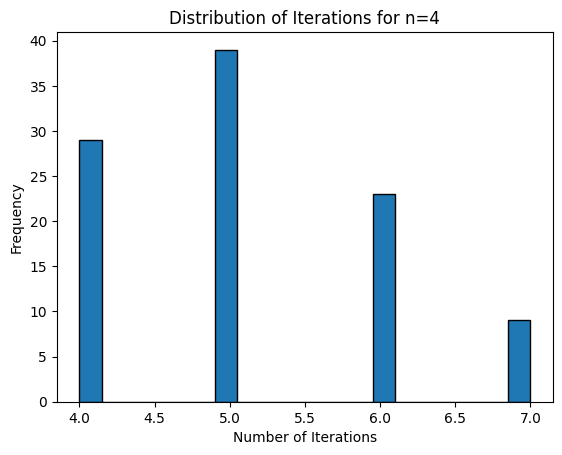

Minimum Iterations: 4
Maximum Iterations: 7
Average Iterations: 5.12
[[13, 15, 22, 20, 9, 26, 19, 37, 25, 5, 29, 21, 28, 23, 35, 18, 32, 0, 16, 36, 8, 31, 1, 11, 38, 39, 3, 17, 4, 12, 2, 6, 14, 33, 34, 10, 27, 7, 30, 24], [37, 6, 26, 11, 31, 4, 39, 24, 10, 27, 36, 18, 12, 35, 32, 20, 25, 28, 7, 17, 14, 5, 13, 23, 34, 29, 22, 2, 19, 30, 33, 21, 8, 15, 9, 0, 3, 38, 1, 16], [18, 14, 9, 12, 29, 35, 31, 7, 37, 24, 15, 20, 4, 38, 36, 0, 16, 5, 10, 39, 23, 27, 30, 1, 33, 3, 21, 6, 11, 26, 22, 28, 32, 17, 34, 19, 25, 8, 13, 2], [5, 13, 38, 29, 20, 31, 2, 27, 23, 12, 6, 21, 14, 24, 36, 18, 15, 30, 34, 3, 33, 0, 28, 4, 1, 16, 22, 8, 9, 37, 11, 17, 39, 25, 32, 19, 7, 26, 10, 35], [23, 2, 26, 13, 24, 12, 6, 5, 9, 0, 1, 32, 18, 17, 3, 33, 10, 7, 36, 14, 8, 35, 21, 38, 22, 19, 37, 11, 27, 20, 16, 4, 15, 39, 25, 29, 28, 31, 34, 30], [22, 12, 29, 18, 6, 28, 17, 0, 3, 27, 25, 4, 36, 7, 19, 11, 24, 13, 9, 14, 20, 34, 2, 32, 35, 31, 23, 8, 30, 5, 38, 26, 10, 16, 21, 33, 37, 15, 39, 1], [39, 27, 26, 24, 1

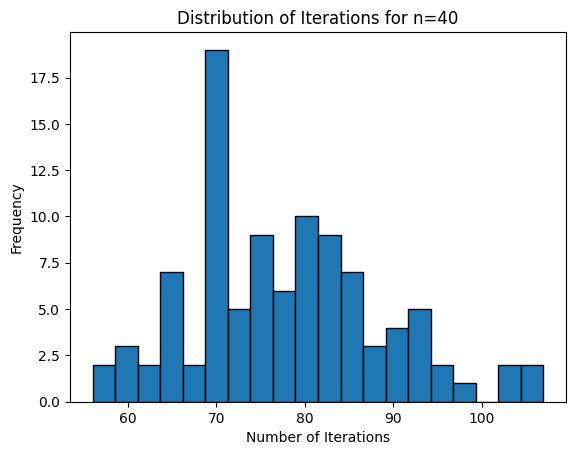

Minimum Iterations: 56
Maximum Iterations: 107
Average Iterations: 77.89


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#Gale-Shapley Algorithm
def gale_shapley(prefer):
    n = len(prefer) // 2
    w_partner = [-1] * n
    m_free = [True] * n
    iterations = 0

    while True:
        try:
            m = m_free.index(True)
        except ValueError:
            break

        for i in prefer[m]:
            w = i - n
            if w_partner[w] == -1:
                w_partner[w] = m
                m_free[m] = False
                break
            else:
                m1 = w_partner[w]
                if prefer[w][m] < prefer[w][m1]:
                    w_partner[w] = m
                    m_free[m] = False
                    m_free[m1] = True
                    break

        iterations += 1

        # Check for stability
        if all(partner != -1 for partner in w_partner):
            break

    return iterations

def run_and_plot(n):
    num_iterations = []
    m=int(n/2)

    for _ in range(100):  # Change the number of iterations

        permutaciones_0_a_3 = [list(np.random.permutation(range(n))) for _ in range(n)]

        permutaciones_4_a_7 = [list(np.random.permutation(range(n, 2 * n))) for _ in range(n)]

        prefer = permutaciones_0_a_3 + permutaciones_4_a_7
        iterations = gale_shapley(prefer)
        num_iterations.append(iterations)
    print(prefer)

    min_iterations = min(num_iterations)
    max_iterations = max(num_iterations)
    avg_iterations = np.mean(num_iterations)

    plt.hist(num_iterations, bins=20, edgecolor='black')
    plt.title(f'Distribution of Iterations for n={n}')
    plt.xlabel('Number of Iterations')
    plt.ylabel('Frequency')
    plt.show()

    print(f"Minimum Iterations: {min_iterations}")
    print(f"Maximum Iterations: {max_iterations}")
    print(f"Average Iterations: {avg_iterations}")

# Run and plot for n=4 and n=40
run_and_plot(4)
run_and_plot(40)


[[2, 0, 1, 3], [2, 1, 3, 0], [1, 0, 3, 2], [3, 2, 1, 0], [6, 7, 4, 5], [4, 5, 7, 6], [5, 4, 6, 7], [6, 5, 4, 7]]


#**Punto 3**

### Simulate the the Gale-Shapley and Irving algorithms using random preference lists , for n=4 and 40 and generate a gift animation fo the type show in “Illustrating the Deferred Acceptance Algorithm with R – Code r-bloggers
### - Gale Shapley R github
### - Deferred acceptance algorithm after Gale and Shapley R github
### - Creating animated GIFs with Pillow pythoninformer
### - Image manipulation recipes in Pillow pythoninformer
### - How do I plot a grayscale image with a 2D array of random numbers in Python? quora


### Galey Shapley Animation gift




In [ ]:
from PIL import Image, ImageDraw
import random
from IPython.display import Image as IPImage, display

def generar_preferencias_aleatorias(n):
    preferencias = {}
    for i in range(n):
        preferencias[i] = list(range(n))
        random.shuffle(preferencias[i])
    return preferencias

def animacion_gale_shapley(preferencias):
    n = len(preferencias)
    hombres = list(range(n))
    mujeres = list(range(n))
    compromisos = {}
    instantaneas = []
    iteraciones = 0  # Contador de iteraciones
    hombres_solteros = n  # Inicialmente todos los hombres son solteros

    while len(compromisos) < n:
        iteraciones += 1
        instantanea = dibujar_instantanea(compromisos, hombres, mujeres, n)
        instantaneas.append(instantanea)

        if not hombres:
            break

        hombre = hombres.pop(0)
        if not preferencias[hombre]:
            hombres_solteros -= 1  # Decrementa la cantidad de hombres solteros
            continue
        mujer = preferencias[hombre].pop(0)
        compromiso_actual = compromisos.get(mujer)
        if compromiso_actual is None:
            compromisos[mujer] = hombre
            hombres_solteros -= 1  # Decrementa la cantidad de hombres solteros
        else:
            preferencias_mujer = preferencias[mujer]
            if hombre in preferencias_mujer and compromiso_actual in preferencias_mujer:
                if preferencias_mujer.index(hombre) < preferencias_mujer.index(compromiso_actual):
                    compromisos[mujer] = hombre
                    hombres.append(compromiso_actual)

    for mujer in mujeres:
        if mujer not in compromisos:
            compromisos[mujer] = None

    print(f"Número de iteraciones: {iteraciones}")
    print(f"Número de hombres solteros al final: {hombres_solteros}")

    return instantaneas

def dibujar_instantanea(compromisos, hombres, mujeres, n):
    img = Image.new("RGB", (2000, 200), (255, 255, 255))
    draw = ImageDraw.Draw(img)
    tamano_celda = 50

    for i in range(n):
        draw.rectangle([(i * tamano_celda, 0), ((i + 1) * tamano_celda, tamano_celda)], outline="black")
        draw.rectangle([(i * tamano_celda, tamano_celda), ((i + 1) * tamano_celda, tamano_celda * 2)], outline="black")
        hombre_comprometido = compromisos.get(i)
        if hombre_comprometido is not None:
            draw.text(((i * tamano_celda) + 10, 10), f"H {hombre_comprometido}", fill="red")
        draw.text(((i * tamano_celda) + 10, tamano_celda + 10), f"M {i}", fill="black")

    return img

n = 4
preferencias = generar_preferencias_aleatorias(n)
instantaneas = animacion_gale_shapley(preferencias)

instantaneas[0].save(
    "animacion_gale_shapley4.gif",
    save_all=True,
    append_images=instantaneas[1:],
    loop=0,
    duration=500,
)

n = 40
preferencias = generar_preferencias_aleatorias(n)
instantaneas = animacion_gale_shapley(preferencias)

instantaneas[0].save(
    "animacion_gale_shapley40.gif",
    save_all=True,
    append_images=instantaneas[1:],
    loop=0,
    duration=500,
)





Número de iteraciones: 4
Número de hombres solteros al final: 0
Número de iteraciones: 47
Número de hombres solteros al final: 10


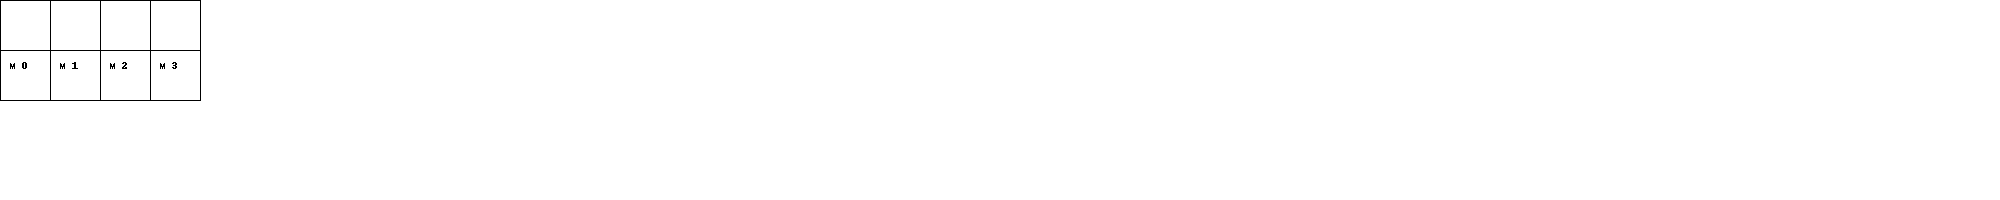

In [ ]:
from IPython.display import Image
from IPython.display import display
display(Image(filename='animacion_gale_shapley4.gif'))

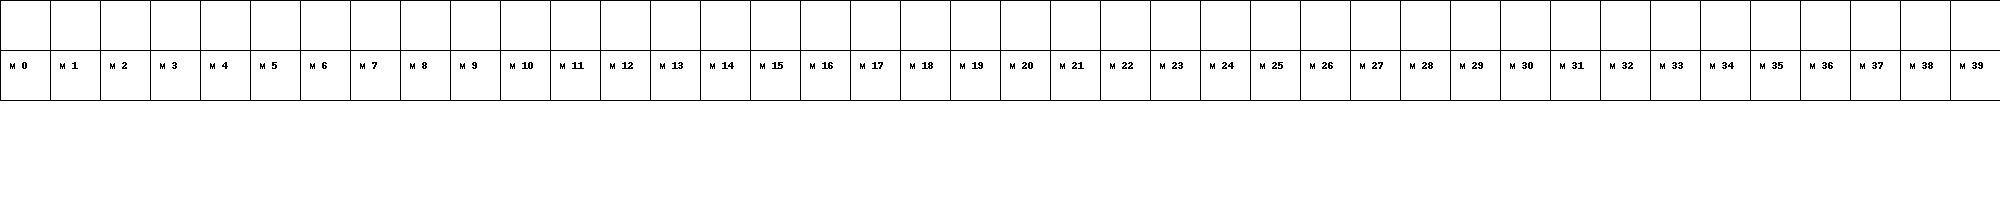

In [ ]:
from IPython.display import Image
from IPython.display import display

display(Image(filename='animacion_gale_shapley40_modificada.gif'))

### Irving animation gift

In [ ]:
from PIL import Image, ImageDraw
import random

def generar_preferencias_aleatorias(n):
    preferencias = {}
    for i in range(n):
        preferencias[i] = list(range(n))
        random.shuffle(preferencias[i])
    return preferencias

def animacion_irving(preferencias):
    n = len(preferencias)
    hombres = list(range(n))
    mujeres = list(range(n))
    compromisos = {}
    propuestas = {hombre: set() for hombre in hombres}
    instantaneas = []
    iteraciones = 0
    hombres_solteros = n

    while len(compromisos) < n:
        iteraciones += 1
        instantanea = dibujar_instantanea(compromisos, hombres, mujeres, n)
        instantaneas.append(instantanea)

        if not hombres:
            break

        hombre = hombres.pop(0)
        while True:
            mujer = preferencias[hombre].pop(0)
            if mujer not in propuestas[hombre]:
                propuestas[hombre].add(mujer)
                compromiso_actual = compromisos.get(mujer)
                if compromiso_actual is None:
                    compromisos[mujer] = hombre
                    hombres_solteros = max(0, hombres_solteros - 1)
                    break
                else:
                    preferencias_mujer = preferencias[mujer]
                    if hombre in preferencias_mujer and compromiso_actual in preferencias_mujer:
                        if preferencias_mujer.index(hombre) < preferencias_mujer.index(compromiso_actual):
                            compromisos[mujer] = hombre
                            hombres.append(compromiso_actual)
                            hombres_solteros = max(0, hombres_solteros - 1)
                            break

    for mujer in mujeres:
        if mujer not in compromisos:
            compromisos[mujer] = None

    print(f"Número de iteraciones: {iteraciones}")
    print(f"Cantidad de hombres solteros al final: {hombres_solteros}")

    return instantaneas

def dibujar_instantanea(compromisos, hombres, mujeres, n):
    img = Image.new("RGB", (2000, 200), (255, 255, 255))
    draw = ImageDraw.Draw(img)
    tamano_celda = 50

    for i in range(n):
        draw.rectangle([(i * tamano_celda, 0), ((i + 1) * tamano_celda, tamano_celda)], outline="black")
        draw.rectangle([(i * tamano_celda, tamano_celda), ((i + 1) * tamano_celda, tamano_celda * 2)], outline="black")
        hombre_comprometido = compromisos.get(i)
        if hombre_comprometido is not None:
            draw.text(((i * tamano_celda) + 10, 10), f"H {hombre_comprometido}", fill="red")
        draw.text(((i * tamano_celda) + 10, tamano_celda + 10), f"M {i}", fill="black")

    return img

n = 4
preferencias = generar_preferencias_aleatorias(n)
instantaneas = animacion_irving(preferencias)

instantaneas[0].save(
    "animacion_irving4.gif",
    save_all=True,
    append_images=instantaneas[1:],
    loop=0,
    duration=500,
)

n = 40
preferencias = generar_preferencias_aleatorias(n)
instantaneas = animacion_irving(preferencias)

instantaneas[0].save(
    "animacion_irving40.gif",
    save_all=True,
    append_images=instantaneas[1:],
    loop=0,
    duration=500,
)


Número de iteraciones: 4
Cantidad de hombres solteros al final: 0
Número de iteraciones: 76
Cantidad de hombres solteros al final: 0


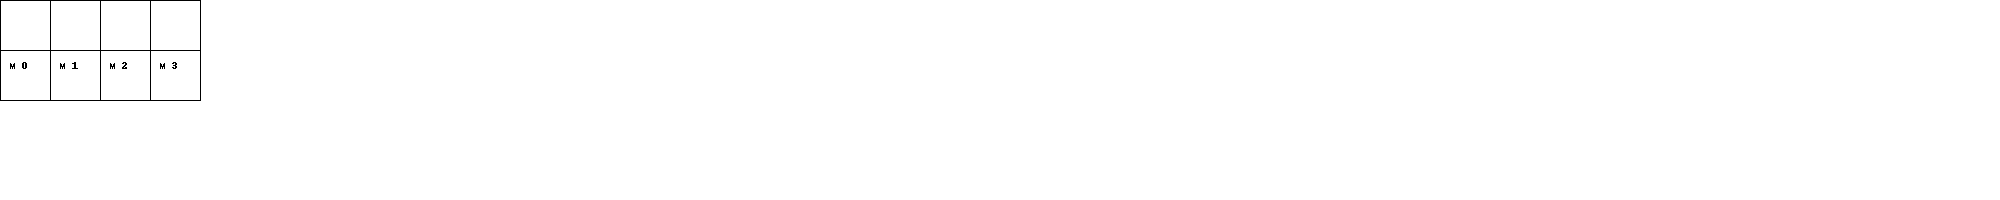

In [ ]:
from IPython.display import Image
from IPython.display import display
display(Image(filename='animacion_irving4.gif'))

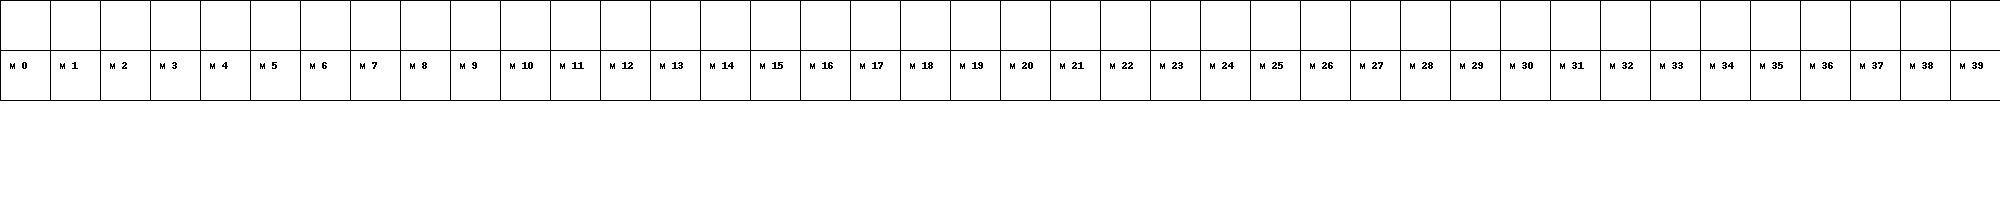

In [ ]:
from IPython.display import Image
from IPython.display import display
display(Image(filename='animacion_irving40.gif'))